# 보너스 악용형(Bonus Abuse Pattern)

## 사전세팅

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
# 1) 나눔폰트 설치
!apt-get -qq -y install fonts-nanum

# 2) matplotlib에서 기본 폰트만 변경
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumGothic')     # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 3) 확인
print("현재 폰트:", plt.rcParams['font.family'])


현재 폰트: ['NanumGothic']


In [85]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/HSU/25-2/싱가포르/data/Reward.csv')
display(df.head())

,account_id,ts,reward_amount
0,A_f96ede8d34,2025-01-02 08:14:06.194179,6.843929
1,A_f96ede8d34,2025-01-02 08:14:06.241981,6.938105
2,A_2db64f326b,2025-01-02 08:15:13.284073,6.843929
3,A_2db64f326b,2025-01-02 08:15:13.381792,6.938105
4,A_f96ede8d34,2025-01-03 07:32:10.198387,7.036313


In [86]:
#csv 파일을 각각 data라는 딕셔너리에 저장하고 보여줌
import os
import pandas as pd

data_dir = '/content/drive/MyDrive/HSU/25-2/싱가포르/data/'

# Dictionary to store DataFrames
data = {}

# List all files in the directory
if os.path.exists(data_dir):
    for filename in os.listdir(data_dir):
        if filename.endswith('.csv'):
            filepath = os.path.join(data_dir, filename)
            df_name = os.path.splitext(filename)[0] # Use filename without extension as key
            print(f"Loading {filename}...")
            try:
                data[df_name] = pd.read_csv(filepath)
                print(f"Successfully loaded '{df_name}'. First 5 rows:")
                display(data[df_name].head())
                print("\n" + "-"*30 + "\n") # Separator for better readability
            except Exception as e:
                print(f"Error loading {filename}: {e}")
else:
    print(f"Directory not found: {data_dir}")

# 개별 DataFrame 변수로 꺼내 쓰기
Reward = data['Reward']
Trade = data['Trade']
IP = data['IP']
Spec = data['Spec']
# You can access your DataFrames like this:
# 예를 들어, 'my_data.csv'가 있다면 data['my_data']로 접근합니다.
# print(data.keys()) # To see all loaded DataFrame names

Loading Reward.csv...
Successfully loaded 'Reward'. First 5 rows:


,account_id,ts,reward_amount
0,A_f96ede8d34,2025-01-02 08:14:06.194179,6.843929
1,A_f96ede8d34,2025-01-02 08:14:06.241981,6.938105
2,A_2db64f326b,2025-01-02 08:15:13.284073,6.843929
3,A_2db64f326b,2025-01-02 08:15:13.381792,6.938105
4,A_f96ede8d34,2025-01-03 07:32:10.198387,7.036313



------------------------------

Loading Funding.csv...
Successfully loaded 'Funding'. First 5 rows:


,account_id,ts,fee_rate,funding_fee
0,A_06d5bd3da9,2025-03-01 00:00:00.348937,0.000050,0.000063
1,A_06d5bd3da9,2025-03-01 00:00:00.348937,0.000050,0.000063
2,A_40cfe40ac2,2025-03-01 00:00:00.806171,0.000100,-0.065085
3,A_7e27164ab6,2025-03-01 00:00:00.889929,0.000022,0.000403
4,A_ebdb869fd3,2025-03-01 00:00:00.889929,0.000022,0.000037



------------------------------

Loading Trade.csv...
Successfully loaded 'Trade'. First 5 rows:


,account_id,ts,symbol,side,openclose,position_id,leverage,price,qty,amount
0,A_c668740478,2025-03-01 00:04:14.329767,BTCUSDT.PERP,LONG,OPEN,P_9ecd54214c,50,84303.5,0.177839,14992.450136
1,A_c668740478,2025-03-01 00:09:08.199617,BTCUSDT.PERP,LONG,CLOSE,P_9ecd54214c,0,84321.0,0.177839,14995.562319
2,A_7e27164ab6,2025-03-01 00:23:25.371503,BTCUSDT.PERP,LONG,OPEN,P_fbe21fd2c4,2,84369.2,0.002787,235.136960
3,A_c668740478,2025-03-01 00:30:03.218306,BTCUSDT.PERP,LONG,OPEN,P_9567d3d1d3,50,84243.3,0.178533,15040.209079
4,A_c668740478,2025-03-01 00:34:38.392647,BTCUSDT.PERP,LONG,CLOSE,P_9567d3d1d3,0,84121.0,0.178533,15018.374493



------------------------------

Loading IP.csv...
Successfully loaded 'IP'. First 5 rows:


,account_id,ip
0,A_1f97e16953,100.222.49.58
1,A_946b028740,18.96.95.89
2,A_78e950c1a2,13.120.90.27
3,A_0e72128b0d,190.83.18.146
4,A_0ad0445c5a,11.179.9.226



------------------------------

Loading Spec.csv...
Successfully loaded 'Spec'. First 5 rows:


,symbol,day,funding_interval,max_order_amount
0,IMXUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
1,MOVEUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
2,SXPUSDT.PERP,2025-03-01 00:00:00.000000,8,75000.0
3,PONKEUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0
4,KDAUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0



------------------------------



In [87]:
#spec.csv를 제외하고 account_id를 인덱스로 설정
for df_name, df in data.items():
    if df_name != 'Spec':
        if 'account_id' in df.columns:
            print(f"Setting 'account_id' as index for '{df_name}' DataFrame...")
            data[df_name] = df.set_index('account_id')
            print(f"Updated '{df_name}' DataFrame. First 5 rows with new index:")
            display(data[df_name].head())
            print("\n" + "-"*30 + "\n")
        else:
            print(f"Warning: 'account_id' column not found in '{df_name}' DataFrame. Skipping index setting.")
    else:
        print(f"Skipping 'Spec' DataFrame as requested. First 5 rows:")
        display(data[df_name].head())
        print("\n" + "-"*30 + "\n")

Setting 'account_id' as index for 'Reward' DataFrame...
Updated 'Reward' DataFrame. First 5 rows with new index:


,ts,reward_amount
account_id,,
A_f96ede8d34,2025-01-02 08:14:06.194179,6.843929
A_f96ede8d34,2025-01-02 08:14:06.241981,6.938105
A_2db64f326b,2025-01-02 08:15:13.284073,6.843929
A_2db64f326b,2025-01-02 08:15:13.381792,6.938105
A_f96ede8d34,2025-01-03 07:32:10.198387,7.036313



------------------------------

Setting 'account_id' as index for 'Funding' DataFrame...
Updated 'Funding' DataFrame. First 5 rows with new index:


,ts,fee_rate,funding_fee
account_id,,,
A_06d5bd3da9,2025-03-01 00:00:00.348937,0.000050,0.000063
A_06d5bd3da9,2025-03-01 00:00:00.348937,0.000050,0.000063
A_40cfe40ac2,2025-03-01 00:00:00.806171,0.000100,-0.065085
A_7e27164ab6,2025-03-01 00:00:00.889929,0.000022,0.000403
A_ebdb869fd3,2025-03-01 00:00:00.889929,0.000022,0.000037



------------------------------

Setting 'account_id' as index for 'Trade' DataFrame...
Updated 'Trade' DataFrame. First 5 rows with new index:


,ts,symbol,side,openclose,position_id,leverage,price,qty,amount
account_id,,,,,,,,,
A_c668740478,2025-03-01 00:04:14.329767,BTCUSDT.PERP,LONG,OPEN,P_9ecd54214c,50,84303.5,0.177839,14992.450136
A_c668740478,2025-03-01 00:09:08.199617,BTCUSDT.PERP,LONG,CLOSE,P_9ecd54214c,0,84321.0,0.177839,14995.562319
A_7e27164ab6,2025-03-01 00:23:25.371503,BTCUSDT.PERP,LONG,OPEN,P_fbe21fd2c4,2,84369.2,0.002787,235.136960
A_c668740478,2025-03-01 00:30:03.218306,BTCUSDT.PERP,LONG,OPEN,P_9567d3d1d3,50,84243.3,0.178533,15040.209079
A_c668740478,2025-03-01 00:34:38.392647,BTCUSDT.PERP,LONG,CLOSE,P_9567d3d1d3,0,84121.0,0.178533,15018.374493



------------------------------

Setting 'account_id' as index for 'IP' DataFrame...
Updated 'IP' DataFrame. First 5 rows with new index:


,ip
account_id,
A_1f97e16953,100.222.49.58
A_946b028740,18.96.95.89
A_78e950c1a2,13.120.90.27
A_0e72128b0d,190.83.18.146
A_0ad0445c5a,11.179.9.226



------------------------------

Skipping 'Spec' DataFrame as requested. First 5 rows:


,symbol,day,funding_interval,max_order_amount
0,IMXUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
1,MOVEUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
2,SXPUSDT.PERP,2025-03-01 00:00:00.000000,8,75000.0
3,PONKEUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0
4,KDAUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0



------------------------------



In [88]:
#spec에서 symbol을 인덱스로 설정
if 'Spec' in data and 'symbol' in data['Spec'].columns:
    print("Setting 'symbol' as index for 'Spec' DataFrame...")
    data['Spec'] = data['Spec'].set_index('symbol')
    print("Updated 'Spec' DataFrame. First 5 rows with new index:")
    display(data['Spec'].head())
else:
    print("Error: 'Spec' DataFrame not found or 'symbol' column not in 'Spec' DataFrame.")

Setting 'symbol' as index for 'Spec' DataFrame...
Updated 'Spec' DataFrame. First 5 rows with new index:


,day,funding_interval,max_order_amount
symbol,,,
IMXUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
MOVEUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
SXPUSDT.PERP,2025-03-01 00:00:00.000000,8,75000.0
PONKEUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0
KDAUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0


In [89]:
import os
import pandas as pd

data_dir = '/content/drive/MyDrive/HSU/25-2/싱가포르/data/'
data = {}

if os.path.exists(data_dir):
    for filename in os.listdir(data_dir):
        if filename.endswith('.csv'):
            filepath = os.path.join(data_dir, filename)
            df_name = os.path.splitext(filename)[0]
            data[df_name] = pd.read_csv(filepath)
            print(f"Loaded {df_name}")
else:
    print("Data directory not found")


Loaded Reward
Loaded Funding
Loaded Trade
Loaded IP
Loaded Spec


## 📌 보너스 지급 시점 전후 거래활동 매칭 및 이상 거래 후보 탐지

### 보너스 이후 10분 내 거래 횟수

trade_count_after_10m
0    188
1      6
2      3
5      1
Name: count, dtype: int64


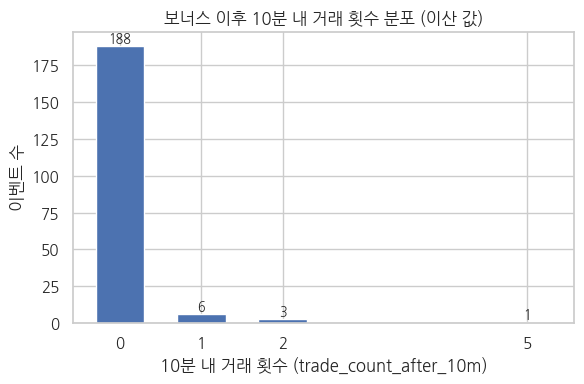


🔎 10분 내 거래 2회 이상 발생한 보너스 이벤트 수: 4


,account_id,reward_time,reward_amount,trade_count_after_10m,total_trade_amount_after_10m,avg_trade_amount_after_10m
26,A_7e27164ab6,2025-09-10 08:01:29.620010,9.996940,2,472205.130023,236102.565012
68,A_55021b4ae2,2025-03-07 14:05:07.170080,4.898770,2,6952.508300,3476.254150
121,A_cab220ef3c,2025-04-07 07:00:39.370670,349.996952,5,19793.966560,3958.793312
186,A_cf3fcea289,2025-04-21 07:01:19.376966,149.998803,2,8089.064080,4044.532040



👤 10분 내 거래 2회 이상 경험한 유저 수: 4
['A_7e27164ab6' 'A_55021b4ae2' 'A_cab220ef3c' 'A_cf3fcea289']


In [97]:
# 0,1,2,... 값별 개수 집계
counts = (
    df_common_match['trade_count_after_10m']
    .value_counts()
    .sort_index()
)

print(counts)

plt.figure(figsize=(6, 4))
plt.bar(counts.index, counts.values, width=0.6)

# x축을 정수로만 표시
plt.xticks(counts.index)

plt.title("보너스 이후 10분 내 거래 횟수 분포 (이산 값)")
plt.xlabel("10분 내 거래 횟수 (trade_count_after_10m)")
plt.ylabel("이벤트 수")

# 각 막대 위에 숫자 표시
for x, y in zip(counts.index, counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# ----------------------------------------
# 🔎 10분 내 거래가 2회 이상인 보너스 이벤트 & 유저 찾기
# ----------------------------------------

# 1) 10분 내 거래가 2회 이상인 보너스 이벤트 필터
events_ge2 = df_common_match[df_common_match['trade_count_after_10m'] >= 2]

print("\n🔎 10분 내 거래 2회 이상 발생한 보너스 이벤트 수:", len(events_ge2))
display(events_ge2.head())

# 2) 해당 이벤트를 경험한 유저(account_id) 목록
users_ge2 = events_ge2['account_id'].unique()
print("\n👤 10분 내 거래 2회 이상 경험한 유저 수:", len(users_ge2))
print(users_ge2)



### 유저별 첫 보너스 이벤트 추출

In [98]:
# ----------------------------------------
# ① 유저별 첫 보너스 이벤트만 추출
#    (df_common_match: 보너스 이벤트 단위 결과)
# ----------------------------------------

first_bonus_events = (
    df_common_match
    .sort_values('reward_time')           # 시간 순으로 정렬
    .groupby('account_id', as_index=False)

    .first()                              # 각 account_id에서 가장 이른 보너스 1건
    .sort_values('trade_count_after_10m',      # 첫 보너스 이후 10분 내 거래 횟수 기준
                 ascending=False)
    .reset_index(drop=True)
)

print(f"첫 보너스를 받은 유저 수(첫 보너스를 받은 이벤트 수): {len(first_bonus_events)}")
display(first_bonus_events.head())


첫 보너스를 받은 유저 수(첫 보너스를 받은 이벤트 수): 49


,account_id,reward_time,reward_amount,trade_count_after_10m,total_trade_amount_after_10m,avg_trade_amount_after_10m
0,A_cf3fcea289,2025-04-21 07:01:19.376966,149.998803,2,8089.06408,4044.53204
1,A_507a86d368,2025-05-28 09:11:12.274963,10.000000,1,19999.99984,19999.99984
2,A_1a7c006b71,2025-05-07 03:12:53.913811,7.497396,1,4669.86009,4669.86009
3,A_06d5bd3da9,2025-07-10 02:15:39.311329,10.000000,0,0.00000,0.00000
4,A_0ad0445c5a,2025-09-10 09:18:31.903550,9.996940,0,0.00000,0.00000


### 유저별 첫 보너스 이후 10분 내 거래 횟수

유저별 첫 보너스 이후 10분 내 거래 횟수 분포 (개수):
trade_count_after_10m
0    46
1     2
2     1
Name: count, dtype: int64


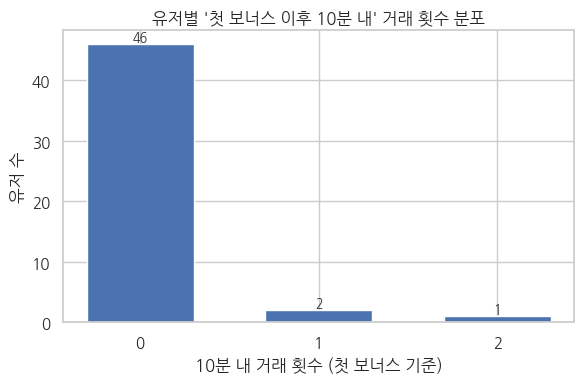


🔎 첫 보너스 이후 10분 내 거래 2회 이상인 유저 수: 1


,account_id,reward_time,reward_amount,trade_count_after_10m,total_trade_amount_after_10m,avg_trade_amount_after_10m
0,A_cf3fcea289,2025-04-21 07:01:19.376966,149.998803,2,8089.06408,4044.53204



👤 첫 보너스 기준으로 10분 내 거래 2회 이상인 유저 ID 리스트:
['A_cf3fcea289']


In [99]:
import matplotlib.pyplot as plt

# 0,1,2,... 값별 개수 집계
first_counts = (
    first_bonus_events['trade_count_after_10m']
    .value_counts()
    .sort_index()
)

print("유저별 첫 보너스 이후 10분 내 거래 횟수 분포 (개수):")
print(first_counts)

plt.figure(figsize=(6, 4))
plt.bar(first_counts.index, first_counts.values, width=0.6)

plt.xticks(first_counts.index)
plt.title("유저별 '첫 보너스 이후 10분 내' 거래 횟수 분포")
plt.xlabel("10분 내 거래 횟수 (첫 보너스 기준)")
plt.ylabel("유저 수")

# 막대 위에 개수 표시
for x, y in zip(first_counts.index, first_counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# ----------------------------------------
# 🔎 첫 보너스 이후 10분 내 거래가 2회 이상인 유저들 찾기
# ----------------------------------------

# 1) 첫 보너스 기준으로 10분 내 거래가 2회 이상인 유저 필터
first_events_ge2 = first_bonus_events[
    first_bonus_events['trade_count_after_10m'] >= 2
]

print("\n🔎 첫 보너스 이후 10분 내 거래 2회 이상인 유저 수:",
      len(first_events_ge2))
display(first_events_ge2.head())

# 2) 해당 유저 account_id 목록
users_ge2_first = first_events_ge2['account_id'].unique()
print("\n👤 첫 보너스 기준으로 10분 내 거래 2회 이상인 유저 ID 리스트:")
print(users_ge2_first)


### 유저별로 보너스를 받은 횟수

👤 유저별 보너스 횟수 (내림차순)


,account_id,bonus_count
0,A_f96ede8d34,22
1,A_2db64f326b,19
2,A_7e27164ab6,16
3,A_d444580218,10
4,A_26ffea8fd9,8
5,A_cab220ef3c,8
6,A_f2ab53d645,7
7,A_ae270b7bf6,6
8,A_59b90616d6,5
9,A_4943ad62b4,5


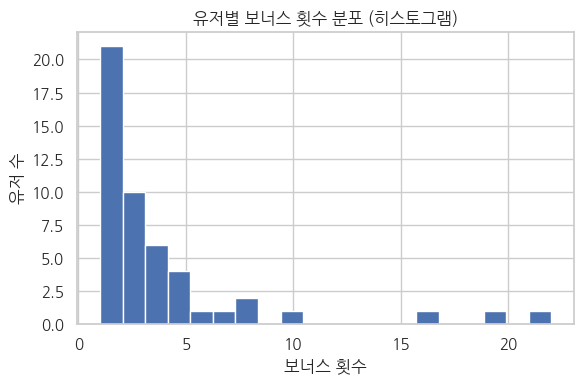

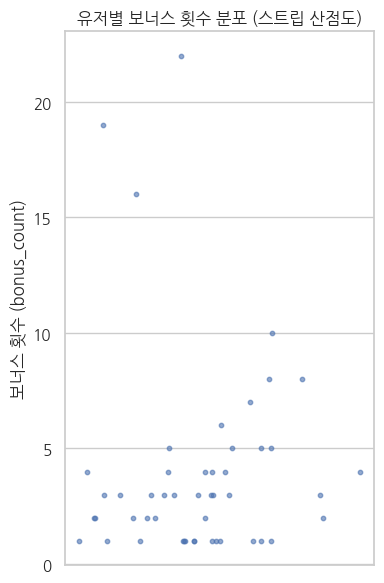

In [100]:
# ----------------------------------------
# 1️⃣ 유저별 전체 보너스 횟수 집계 + 내림차순 정렬
# ----------------------------------------
bonus_count_per_user = (
    df_common_match
    .groupby('account_id')
    .size()
    .rename('bonus_count')        # 유저별 받은 보너스 총 횟수
    .reset_index()
    .sort_values('bonus_count', ascending=False)  # 🔽 보너스 횟수 기준 내림차순
    .reset_index(drop=True)
)

print("👤 유저별 보너스 횟수 (내림차순)")
display(bonus_count_per_user.head(20))

plt.figure(figsize=(6, 4))
plt.hist(bonus_count_per_user['bonus_count'], bins=20)

plt.title("유저별 보너스 횟수 분포 (히스토그램)")
plt.xlabel("보너스 횟수")
plt.ylabel("유저 수")
plt.tight_layout()
plt.show()


y = bonus_count_per_user['bonus_count'].values
n = len(y)

# x축을 0 근처에 약간만 흩뿌려서 겹침 방지 (jitter)
x = np.random.normal(loc=0.0, scale=0.05, size=n)

plt.figure(figsize=(4, 6))
plt.scatter(x, y, alpha=0.6, s=10)

plt.xticks([])  # x축 눈금 제거
plt.title("유저별 보너스 횟수 분포 (스트립 산점도)")
plt.ylabel("보너스 횟수 (bonus_count)")

plt.tight_layout()
plt.show()


# 보너스 악용형 의심 유저 A_cf3fcea289


🚨 보너스 악용 의심 계정:


,account_id,bonus_count,total_trade_after_10m,trade_count_after_10m_first_bonus
48,A_cf3fcea289,1,2,2


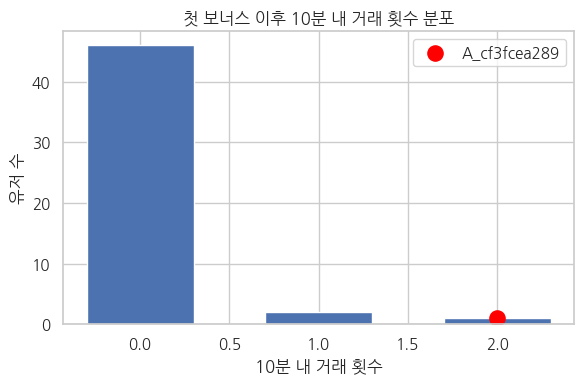

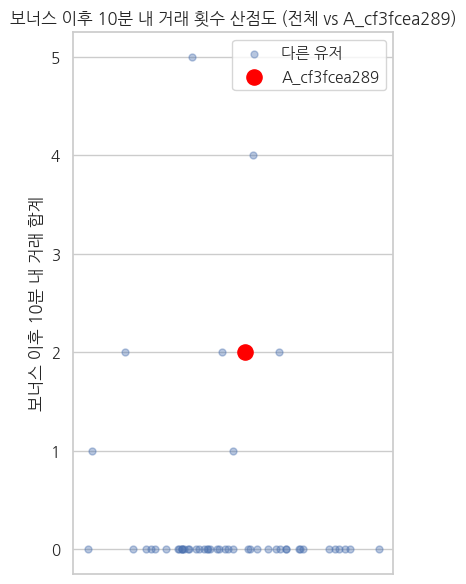

In [101]:
print("🚨 보너스 악용 의심 계정:")
display(suspect_accounts)
# 전체 분포
counts = first_bonus_events['trade_count_after_10m'].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values, width=0.6)

# 이 계정의 값 표시
user_value = first_bonus_events[first_bonus_events['account_id']=="A_cf3fcea289"]['trade_count_after_10m'].iloc[0]

plt.scatter(user_value, counts.get(user_value, 0), color='red', s=120, label='A_cf3fcea289')

plt.title("첫 보너스 이후 10분 내 거래 횟수 분포")
plt.xlabel("10분 내 거래 횟수")
plt.ylabel("유저 수")
plt.legend()
plt.tight_layout()
plt.show()

# 산점도 x축은 의미 없는 jitter(흩뿌림), y축이 관찰 대상
y = user_summary['total_trade_after_10m'].values
n = len(y)

# x축 jitter 주기
x = np.random.normal(loc=0.0, scale=0.05, size=n)

plt.figure(figsize=(4, 6))
plt.scatter(x, y, alpha=0.4, s=25, label='다른 유저')

# 특정 계정 강조
target = user_summary[user_summary['account_id'] == "A_cf3fcea289"]
plt.scatter(0, target['total_trade_after_10m'],
            color='red', s=120, label='A_cf3fcea289')

plt.xticks([])  # x축 제거 (의미 없음)
plt.ylabel("보너스 이후 10분 내 거래 합계")
plt.title("보너스 이후 10분 내 거래 횟수 산점도 (전체 vs A_cf3fcea289)")
plt.legend()

plt.tight_layout()
plt.show()
